# HW6_xy1002 developed from fbb scheleton notebook 

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import datetime
import zipfile
import statsmodels.api as sm 
import statsmodels.formula.api as smf

#s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#download, and move data to PUIDATA, and read data in 
!curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'
nrg = gp.GeoDataFrame.from_csv('rows.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3110k    0 3110k    0     0  5846k      0 --:--:-- --:--:-- --:--:-- 17.8M


In [5]:
!curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"
# http://stackoverflow.com/questions/3451111/unzipping-files-in-python
zf = zipfile.ZipFile("mn_mappluto_16v1.zip")
zf.extractall("Manhattan")
zf.close
MN = gp.read_file('Manhattan/MNMapPLUTO.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  4960k      0  0:00:02  0:00:02 --:--:-- 5305k


In [6]:
!curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bx_mappluto_16v2.zip"

# http://stackoverflow.com/questions/3451111/unzipping-files-in-python
zf = zipfile.ZipFile("bx_mappluto_16v2.zip")
zf.extractall("Bronx")
zf.close
BX = gp.read_file('Bronx/BXMapPLUTO.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0M  100 18.0M    0     0  9413k      0  0:00:01  0:00:01 --:--:--  9.9M


In [7]:
!curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v2.zip"
# http://stackoverflow.com/questions/3451111/unzipping-files-in-python
zf = zipfile.ZipFile("bk_mappluto_16v2.zip")
zf.extractall("Brooklyn")
zf.close
BK = gp.read_file('Brooklyn/BKMapPLUTO.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50.4M  100 50.4M    0     0  5642k      0  0:00:09  0:00:09 --:--:-- 6323k


In [8]:
!curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/qn_mappluto_16v2.zip"
# http://stackoverflow.com/questions/3451111/unzipping-files-in-python
zf = zipfile.ZipFile("qn_mappluto_16v2.zip")
zf.extractall("Queens")
zf.close
QN = gp.read_file('Queens/QNMapPLUTO.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59.9M  100 59.9M    0     0  8064k      0  0:00:07  0:00:07 --:--:-- 8699k


In [10]:
!curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/si_mappluto_16v2.zip"
# http://stackoverflow.com/questions/3451111/unzipping-files-in-python
zf = zipfile.ZipFile("si_mappluto_16v2.zip")
zf.extractall("SI")
zf.close
SI = gp.read_file('SI/SIMapPLUTO.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M  100 24.2M    0     0  10.4M      0  0:00:02  0:00:02 --:--:-- 11.1M


In [11]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [30]:
nrg1 = nrg[['NYC Borough, Block, and Lot (BBL)', 'Zip Code', 'Weather Normalized Site EUI(kBtu/ft2)']]

nrg1.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
nrg1 = nrg1[nrg1['Weather Normalized Site EUI(kBtu/ft2)'] != 'Not Available']
nrg1 = nrg1.dropna()
nrg1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,BBL,Zip Code,Weather Normalized Site EUI(kBtu/ft2)
Record Number,,,
3028,1.013110e+09,10022.0,123.8
9863,4.002520e+09,11101.0,46
977,1.007660e+09,10011.0,122.4
1256,1.008150e+09,10018.0,115.9
500,1.005050e+09,10013.0,81.9


In [31]:
MN.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [40]:
# make sure you clean up your data and throw away columns you do not need!
MN1 = MN[['BBL', 'YearBuilt']]
MN1['Age'] =  2016 - MN1['YearBuilt']
MN1 = MN1[MN1['Age'] < 2016]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [41]:
BX1 = BX[['BBL', 'YearBuilt']]
BX1['Age'] =  2016 - BX1['YearBuilt']
BX1 = BX1[BX1['Age'] < 2016]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
BK1 = BK[['BBL', 'YearBuilt']]
BK1['Age'] =  2016 - BK1['YearBuilt']
BK1 = BK1[BK1['Age'] < 2016]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
QN1 = QN[['BBL', 'YearBuilt']]
QN1['Age'] =  2016 - QN1['YearBuilt']
QN1 = QN1[QN1['Age'] < 2016]
#QN1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
SI1 = SI[['BBL', 'YearBuilt']]
SI1['Age'] =  2016 - SI1['YearBuilt']
SI1 = SI1[SI1['Age'] < 2016]
#SI1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
# the method in the uppers cell didn't convert those values that are not NaN, don't know why. So we figured to use 
# another way to convert value to float. 
# Credit to John,jt2276
nrg1['Weather Normalized Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg1['Weather Normalized Site EUI(kBtu/ft2)'], errors = 'coerce')
MN1['BBL'] = pd.to_numeric(MN1['BBL'], errors = 'coerce')
BX1['BBL'] = pd.to_numeric(BX1['BBL'], errors = 'coerce')
BK1['BBL'] = pd.to_numeric(BK1['BBL'], errors = 'coerce')
QN1['BBL'] = pd.to_numeric(QN1['BBL'], errors = 'coerce')
SI1['BBL'] = pd.to_numeric(SI1['BBL'], errors = 'coerce')

In [52]:
##check that your conversion worked: e.g.
#print (nrg1['Weather Normalized Site EUI(kBtu/ft2)'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
#MN1.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [136]:
# prepare your BBL columns
# I did rename the column in the first few rows
#merge
MNnrgdata = pd.merge(MN1, nrg1, how='inner', on =['BBL'])
MNnrgdata['nrg'] = MNnrgdata['Weather Normalized Site EUI(kBtu/ft2)']
MNnrgdata = MNnrgdata.dropna()
MNnrgdata_cut = MNnrgdata[MNnrgdata['nrg'] < 1000]
#MNnrgdata.head()

In [137]:
BXnrgdata = pd.merge(BX1, nrg1, how='inner', on =['BBL'])
BXnrgdata['nrg'] = BXnrgdata['Weather Normalized Site EUI(kBtu/ft2)']
BXnrgdata = BXnrgdata.dropna()
BXnrgdata_cut = BXnrgdata[BXnrgdata['nrg'] < 1000]
#BXnrgdata.head()

In [138]:
BKnrgdata = pd.merge(BK1, nrg1, how='inner', on =['BBL'])
BKnrgdata['nrg'] = BKnrgdata['Weather Normalized Site EUI(kBtu/ft2)']
BKnrgdata = BKnrgdata.dropna()
BKnrgdata_cut = BKnrgdata[BKnrgdata['nrg'] < 1000]
#BKnrgdata.head()

In [140]:
QNnrgdata = pd.merge(QN1, nrg1, how='inner', on =['BBL'])
QNnrgdata['nrg'] = QNnrgdata['Weather Normalized Site EUI(kBtu/ft2)']
QNnrgdata = QNnrgdata.dropna()
QNnrgdata_cut = QNnrgdata[QNnrgdata['nrg'] < 1000]
#QNnrgdata.head()

In [141]:
SInrgdata = pd.merge(SI1, nrg1, how='inner', on =['BBL'])
SInrgdata['nrg'] = SInrgdata['Weather Normalized Site EUI(kBtu/ft2)']
SInrgdata = SInrgdata.dropna()
SInrgdata_cut = SInrgdata[SInrgdata['nrg'] < 1000]
#SInrgdata.head()

In [148]:
NYCnrgdata = MNnrgdata

In [149]:
#NYCnrgdata.append(MNnrgdata)
NYCnrgdata = NYCnrgdata.append(BXnrgdata)
NYCnrgdata = NYCnrgdata.append(BKnrgdata)
NYCnrgdata = NYCnrgdata.append(QNnrgdata)
NYCnrgdata = NYCnrgdata.append(SInrgdata)

len(NYCnrgdata)

8813

In [150]:
NYCnrgdata_cut = NYCnrgdata[NYCnrgdata['nrg'] < 1000]
len(NYCnrgdata_cut)

8754

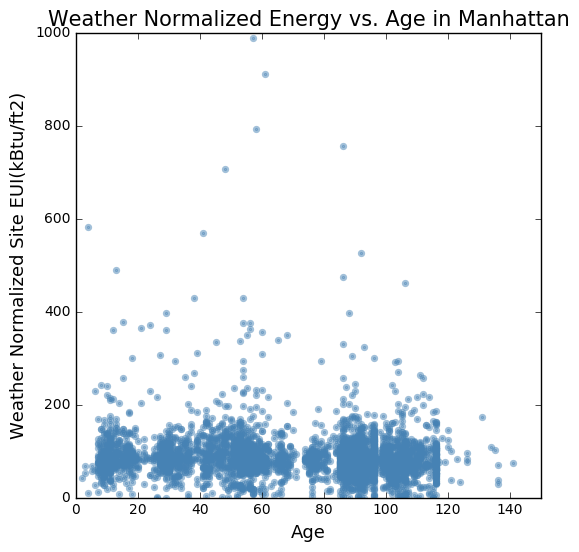

In [130]:
# first scatter plot
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(MNnrgdata['Age'],MNnrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in Manhattan', fontsize = 15)

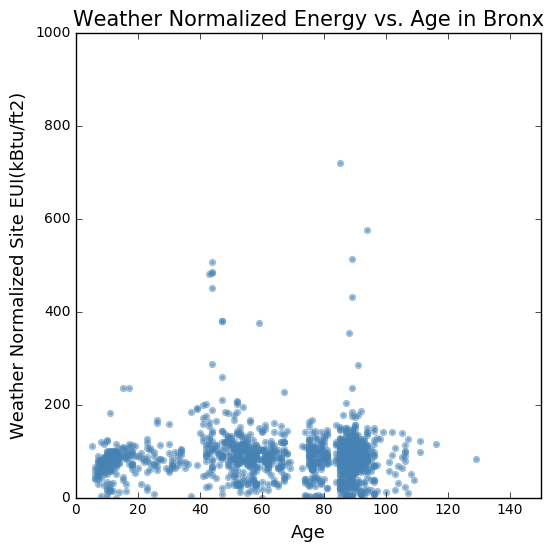

In [131]:
# first scatter plot
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(BXnrgdata['Age'],BXnrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in Bronx', fontsize = 15)

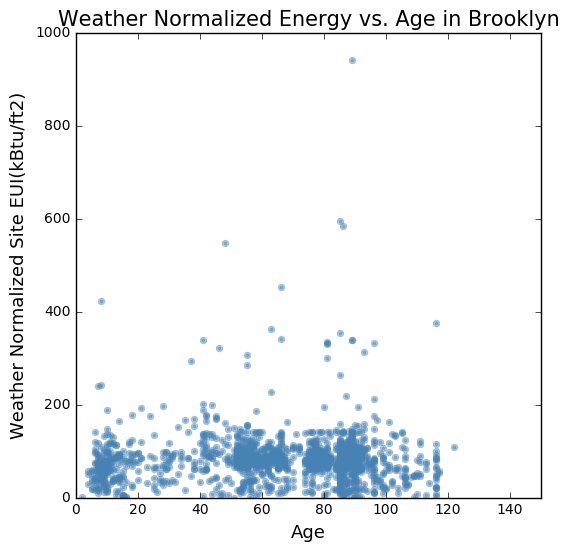

In [132]:
# first scatter plot
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(BKnrgdata['Age'],BKnrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in Brooklyn', fontsize = 15)

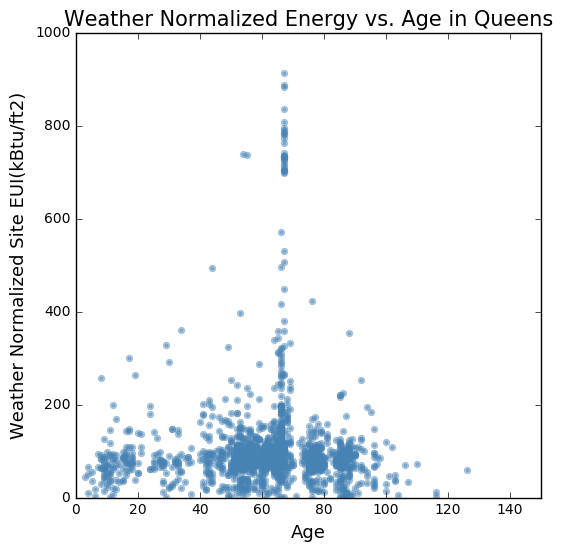

In [133]:
# first scatter plot
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(QNnrgdata['Age'],QNnrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in Queens', fontsize = 15)

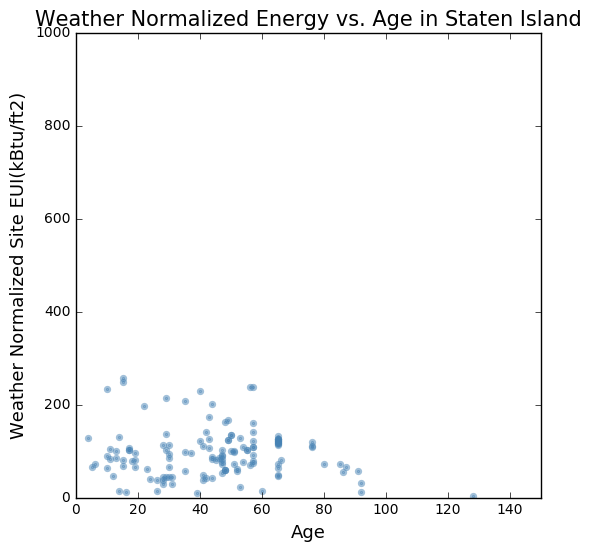

In [134]:
# first scatter plot
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(SInrgdata['Age'],SInrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in Staten Island', fontsize = 15)

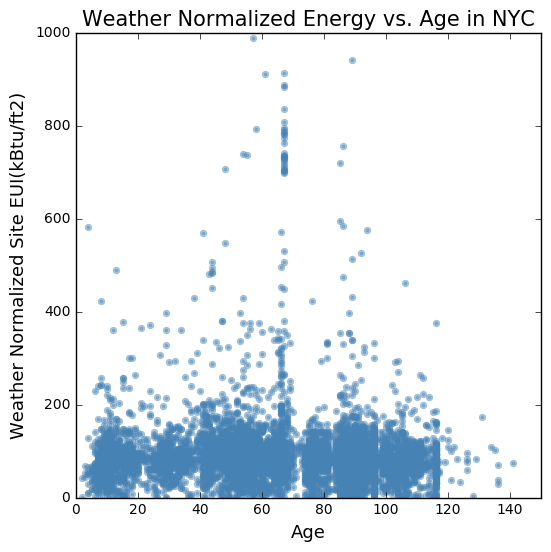

In [135]:
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(NYCnrgdata['Age'],NYCnrgdata['nrg'],linewidth= 3, s=5, alpha = 0.5, color = 'steelblue')
pl.ylabel('Weather Normalized Site EUI(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Weather Normalized Energy vs. Age in NYC', fontsize = 15)

In [153]:
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)

# 1.Fit a line to Units vs Energy.
nrg_mn = MNnrgdata_cut['nrg']
age_mn = MNnrgdata_cut['Age']
X_mn = sm.add_constant(age_mn)
linmodel_mn = sm.OLS(nrg_mn, X_mn).fit() # ignores entires where x or y is NaN

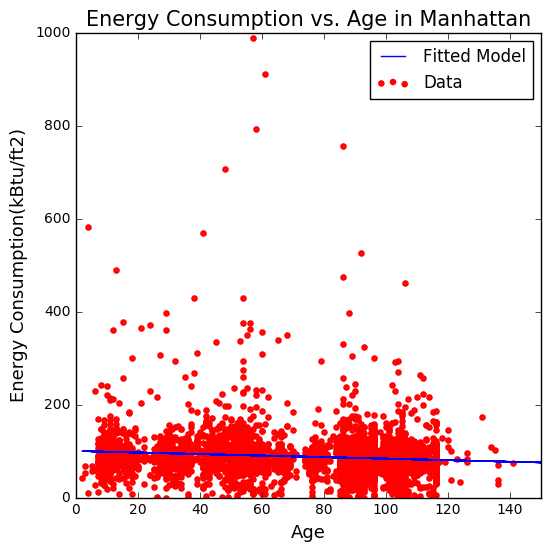

In [159]:
#plot fited model for Units vs Energy.
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_mn, nrg_mn, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_mn, linmodel_mn.predict(X_mn), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in Manhattan', fontsize = 15)
pl.legend()


In [161]:
# 1.Fit a line to Units vs Energy.
nrg_bx = BXnrgdata_cut['nrg']
age_bx = BXnrgdata_cut['Age']
X_bx = sm.add_constant(age_bx)
linmodel_bx = sm.OLS(nrg_bx, X_bx).fit() # ignores entires where x or y is NaN

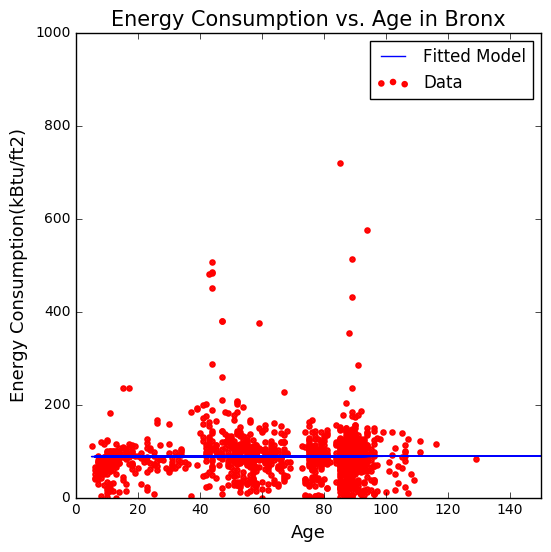

In [162]:
#plot fited model for Units vs Energy.
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_bx, nrg_bx, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_bx, linmodel_bx.predict(X_bx), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in Bronx', fontsize = 15)
pl.legend()


In [163]:
# 1.Fit a line to Units vs Energy.
nrg_bk = BKnrgdata_cut['nrg']
age_bk = BKnrgdata_cut['Age']
X_bk = sm.add_constant(age_bk)
linmodel_bk = sm.OLS(nrg_bk, X_bk).fit() # ignores entires where x or y is NaN

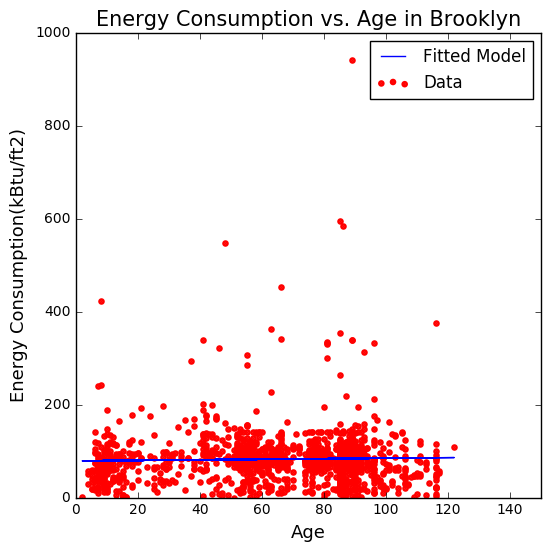

In [164]:
#plot fited model for Units vs Energy.
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_bk, nrg_bk, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_bk, linmodel_bk.predict(X_bk), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in Brooklyn', fontsize = 15)
pl.legend()


In [165]:
nrg_qn = QNnrgdata_cut['nrg']
age_qn = QNnrgdata_cut['Age']
X_qn = sm.add_constant(age_qn)
linmodel_qn = sm.OLS(nrg_qn, X_qn).fit() # ignores entires where x or y is NaN

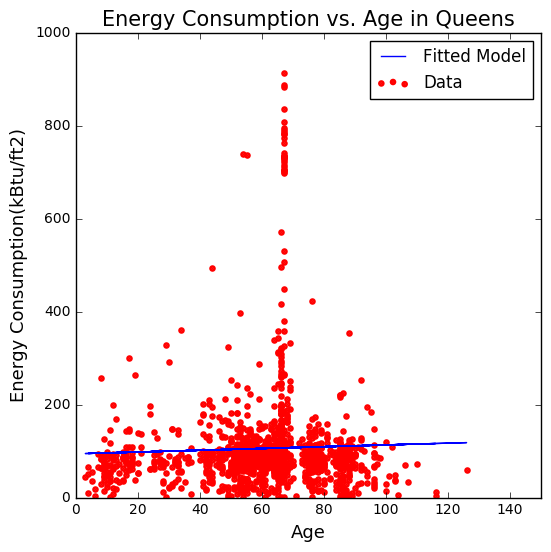

In [166]:
#plot fited model for Units vs Energy.
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_qn, nrg_qn, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_qn, linmodel_qn.predict(X_qn), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in Queens', fontsize = 15)
pl.legend()


In [167]:
nrg_si = SInrgdata_cut['nrg']
age_si = SInrgdata_cut['Age']
X_si = sm.add_constant(age_si)
linmodel_si = sm.OLS(nrg_si, X_si).fit() # ignores entires where x or y is NaN

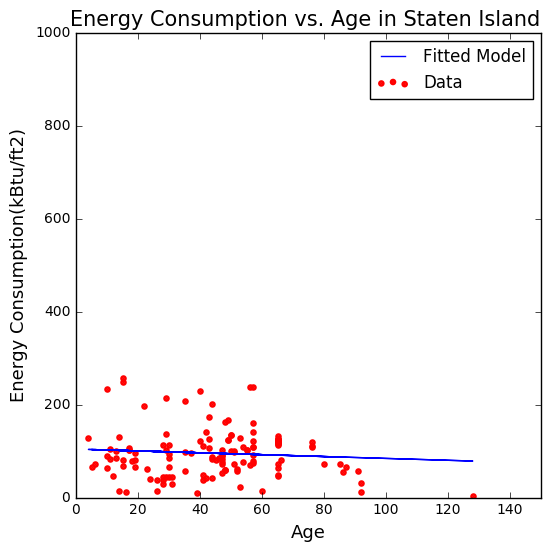

In [168]:
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_si, nrg_si, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_si, linmodel_si.predict(X_si), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in Staten Island ', fontsize = 15)
pl.legend()


In [169]:
nrg_nyc = NYCnrgdata_cut['nrg']
age_nyc = NYCnrgdata_cut['Age']
X_nyc = sm.add_constant(age_nyc)
linmodel_nyc = sm.OLS(nrg_nyc, X_nyc).fit() # ignores entires where x or y is NaN

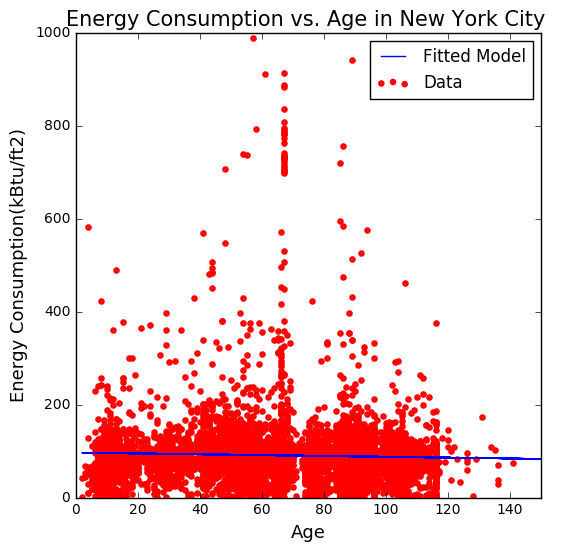

In [170]:
pl.figure(figsize=(6,6))
pl.ylim (0, 1000)
pl.xlim (0, 150)
pl.scatter(age_nyc, nrg_nyc, linewidth= 3, s=3, color = 'red', label = 'Data')
pl.plot(age_nyc, linmodel_nyc.predict(X_nyc), label = 'Fitted Model')
pl.ylabel('Energy Consumption(kBtu/ft2)', fontsize = 13)
pl.xlabel('Age', fontsize = 13)
pl.title('Energy Consumption vs. Age in New York City ', fontsize = 15)
pl.legend()
